## Diabetes Prediction

### Загрузка данных

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn
import random
from pandas_profiling import ProfileReport
from IPython.display import display
from tqdm.notebook import tqdm

%matplotlib inline

warnings.filterwarnings('ignore')

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")

display(df.head())
display(df.describe())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Задача

Данные собраны с помощью телефонного опроса о хронических заболеваниях и использовании профилактических медицинских услуг, в котором ежегодно принимает участие порядка 400k американцев. Датасет основан на ответах на вопросы, получаемых с 1984 года по 2015 год.  
Одна из задач, предлагаемая авторами, заключается в том, чтобы на основе имеющихся данных классифицировать ответчиков на 3 класса: 0 - диабет отсутствует (либо беременность), 1 - преддиабет, 2 - диабет.  
  
Датасет содержит 253680 наблюдений и 22 признак.  

`Diabetes_012` &mdash; Класс участника опроса (0, 1 или 2). Целевая переменная.  
`HighBP` &mdash; Высокое кровяное давление (0 - не наблюдалось, 1 - наблюдалось).  
`HighChol` &mdash; Высокий холестерин (0 - не наблюдался, 1 - наблюдался).  
`CholCheck` &mdash; Была ли проверка холестирина в последние 5 лет (0 - нет, 1 - да).  
`BMI` &mdash; Индекс массы тела (вещественное число).  
`Smoker` &mdash; Употребил ли участник опроса более 100 сигарет за свою жизнь (0 - нет, 1 - да).  
`Stroke` &mdash; Был инсульт (0 - нет, 1 - да).  
`HeartDiseaseorAttack` &mdash; Наблюдалась ли ишемическая болезнь сердца или инфаркт миокарда (0 - нет, 1 - да).  
`PhysActivity` &mdash; Была ли физическая активность (не связанная с работой) в последние 30 дней (0 - нет, 1 - да).  
`Fruits` &mdash; Употребляет ли участник опроса фрукты не менее раза в день (0 - нет, 1 - да).  
`Veggies` &mdash; Употребляет ли участник опроса овощи не менее раза в день (0 - нет, 1 - да).  
`HvyAlcoholConsump` &mdash; Часто ли выпивает ответчик (более 14 раз в неделю для взрослых мужчин, более 7 раз в неделю для взрослых женщин) (0 - нет, 1 - да).  
`AnyHealthcare` &mdash; Имеется ли какой-либо вид медицинского обслуживания вроде страховки или предоплаченных планов (0 - нет, 1 - да).  
`NoDocbcCost` &mdash; Бывало ли на протяжении последнего года так, что нужна консультация с врачом, но недостаточно для этого средств (0 - нет, 1 - да).  
`GenHlth` &mdash; Общая оценка здоровья от 1 до 5 (где 1 - отлично, 5 - ужасно).  
`MentHlth` &mdash; Сколько дней за последний месяц у участника опроса наблюдались ментальные проблемы (стресс, депрессия и пр.) (от 0 до 30).  
`PhysHlth` &mdash; Сколько дней за последний месяц у участника опроса наблюдались какие-либо заболевания или травмы (от 0 до 30).  
`DiffWalk` &mdash; Имеются ли какие-либо проблемы с ходьбой и подъемом по лестнице (0 - нет, 1 - да).  
`Sex` &mdash; 0 - женщина, 1 - мужчина  
`Age` &mdash; Возрастная категория в соответствии с _AGEG5YR_ таблицей NAHDAP (1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 45-49, 5=40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80 или старше).  
`Education` &mdash; Уровень образования (1 - нет школьного образования, 2 - окончено 8 классов, 3 - окончено 9-11 классов, 4 - оконченное среднее образование, 5 - студент бакалавриата, 6 - степень бакалавра и выше).  
`Income` &mdash; Уровень дохода (в год, в долларах) согласно _INCOME2_ таблице NAHDAP (1 - менее 10k, 2 - 10k-15k, 3 - 15k-20k, 4 - 20k-25k, 5 - 25k-35k, 6 - 35k-50k, 7 - 50k-75k, 8 - более 75k).  

Большинство признаков бинарные; __категориальные отсутствуют__.  
  
Источник дтасета: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv)

In [3]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

#### Пропущенные значения

In [4]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

В датасете полностью отсутствуют пропущенные значения

### EDA

In [5]:
sns.set_style("darkgrid")
sns.set_context("notebook")

Посмотрим на распределение целевой переменной

<AxesSubplot:xlabel='Diabetes_012', ylabel='Count'>

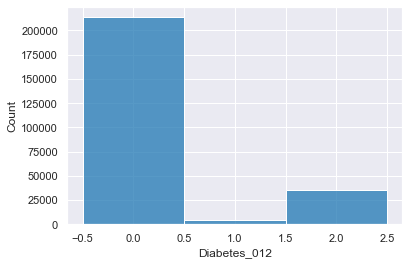

In [6]:
sns.histplot(data=df, x="Diabetes_012", discrete=True)

Классы очень не сбалансированы

In [7]:
print("0-class : 1-class : 2-class")
print(f"{len(df[df['Diabetes_012']==0])}  : {len(df[df['Diabetes_012']==1])}    : {len(df[df['Diabetes_012']==2])}")

0-class : 1-class : 2-class
213703  : 4631    : 35346


Соотношение классов примерно $46 : 1 : 8$

Посмотрим как соотносятся разные переменные с целевой

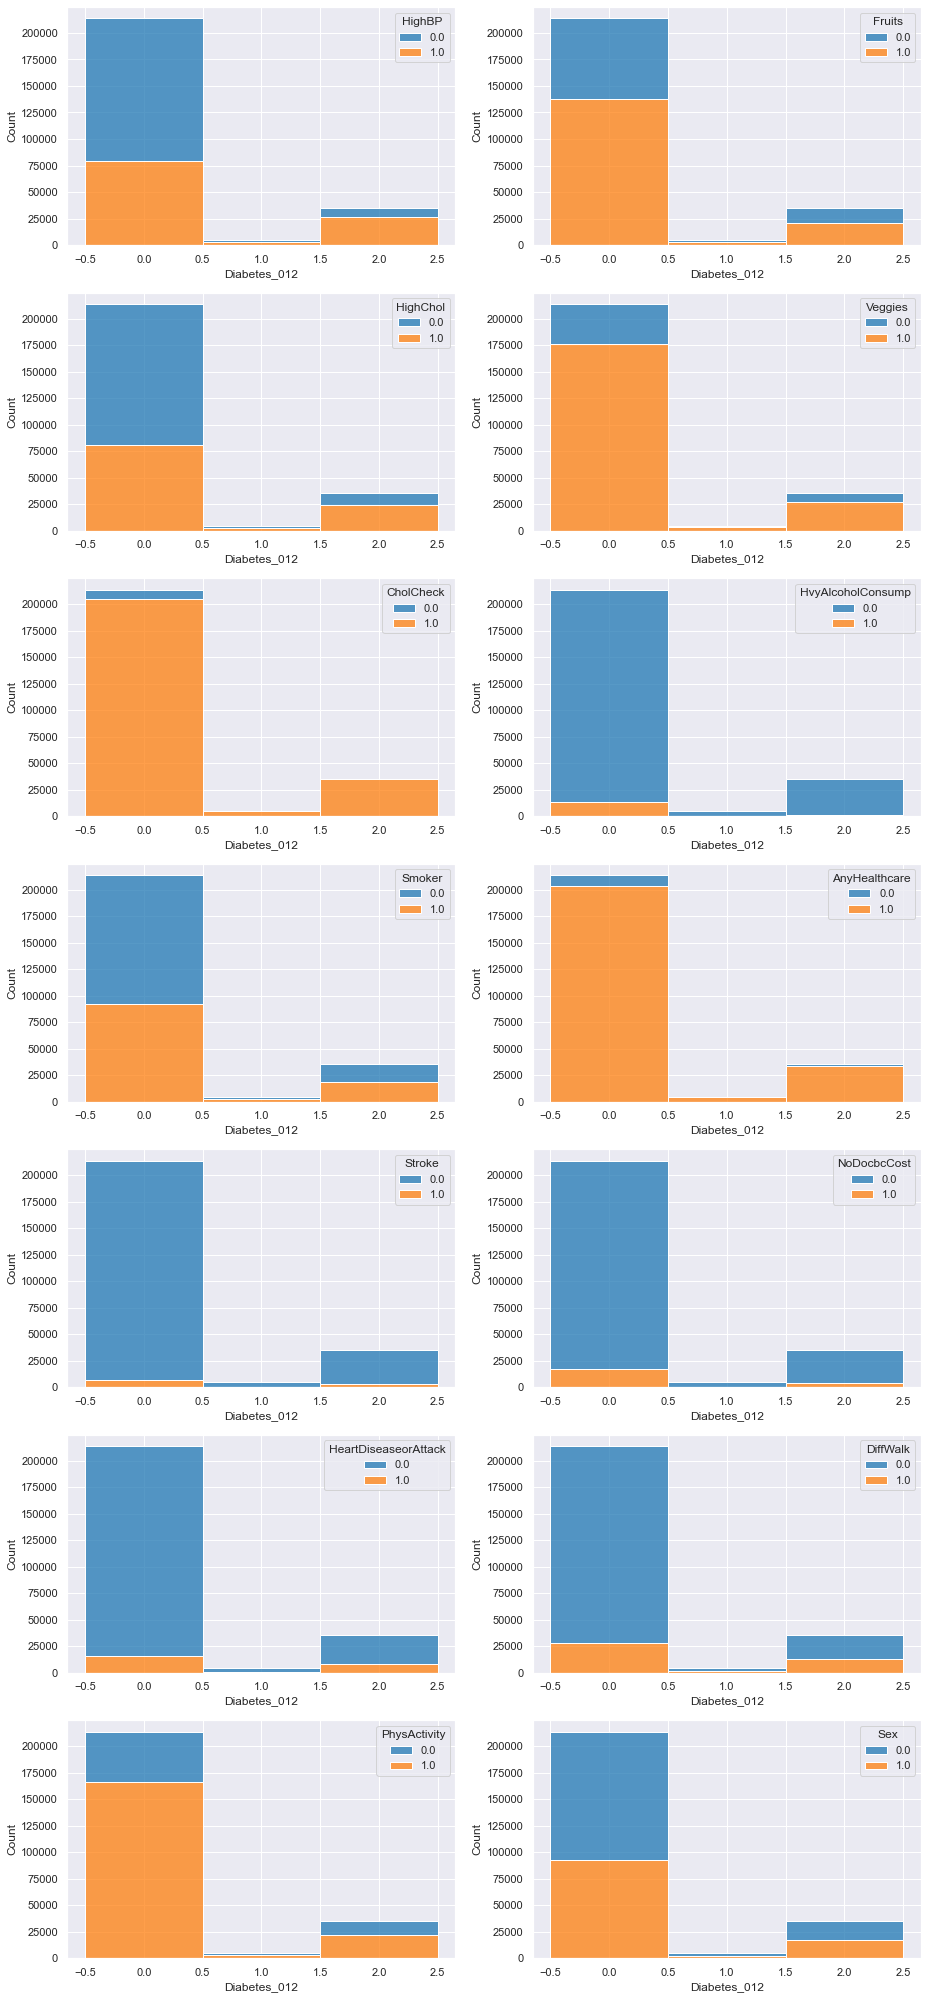

In [8]:
fig, axes = plt.subplots(7, 2)

plt.subplots_adjust(right=2.1, top=6.9)

bin_answers = df.drop(columns=["Diabetes_012", "BMI", "GenHlth", "MentHlth", "PhysHlth", "Education", "Age", "Income"])
for (idx, column) in enumerate(bin_answers):
    sns.histplot(data=df, x="Diabetes_012", discrete=True, hue=column, multiple="stack", ax=axes[idx % 7][idx // 7])

Можно сделать несколько выводов:  
1) Статистически наличие диабета почти не коррелирует от пола, курения, физической активности, потребления овощей и фруктов.  
2) Сильная алкогольная зависимость в наблюдается только у здоровых (и не беременных) людей.  
3) У больных диабетом чаще встречается высокие кровяное давление и холестерин, а также чаще возникают сердечные приступы.

<AxesSubplot:xlabel='Education', ylabel='Count'>

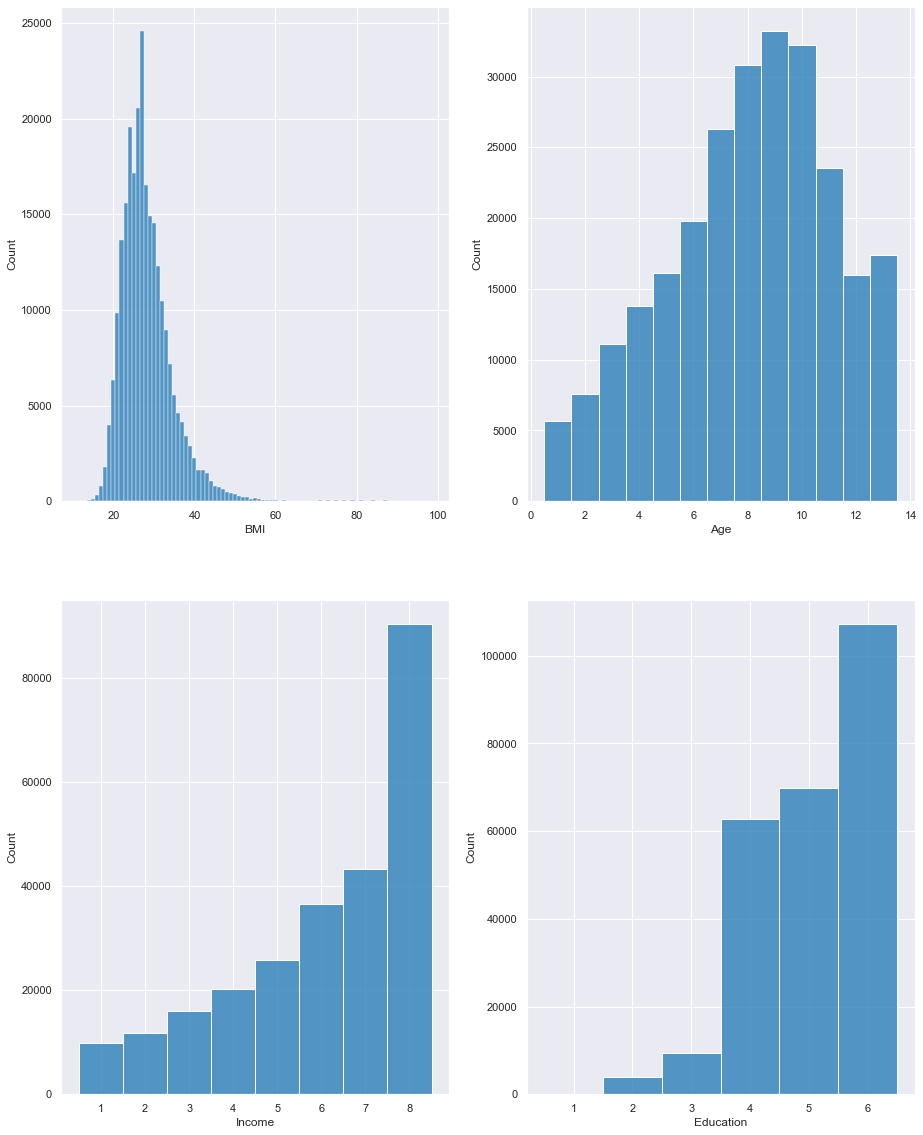

In [9]:
fig, axes = plt.subplots(2, 2)

plt.subplots_adjust(right=2.1, top=3.9)

sns.histplot(data=df, x="BMI", discrete=True, ax=axes[0][0])
sns.histplot(data=df, x="Age", discrete=True, ax=axes[0][1])
sns.histplot(data=df, x="Income", discrete=True, ax=axes[1][0])
sns.histplot(data=df, x="Education", discrete=True, ax=axes[1][1])

<AxesSubplot:xlabel='PhysHlth', ylabel='MentHlth'>

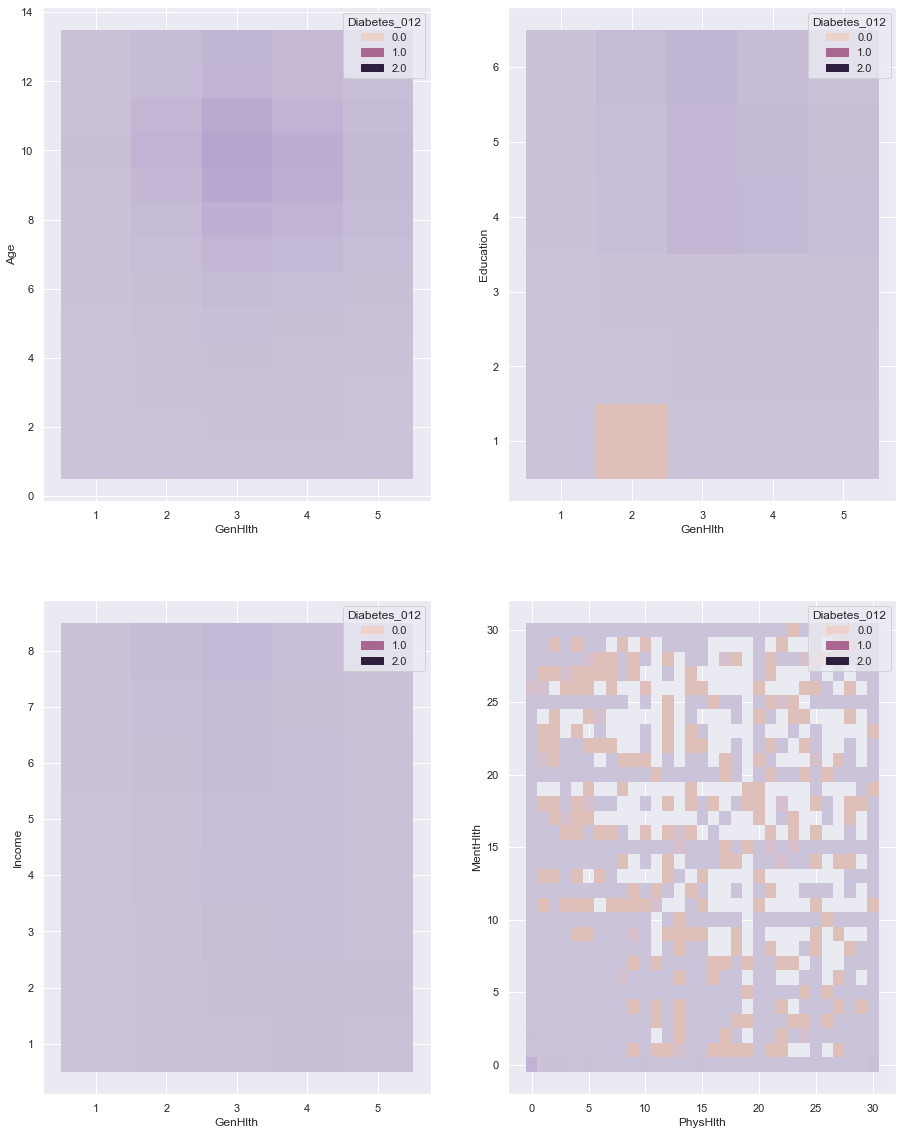

In [10]:
fig, axes = plt.subplots(2, 2)

plt.subplots_adjust(right=2.1, top=3.9)

sns.histplot(data=df, x="GenHlth", y="Age", hue="Diabetes_012", discrete=True, ax=axes[0][0])
sns.histplot(data=df, x="GenHlth", y="Education", hue="Diabetes_012", discrete=True, ax=axes[0][1])
sns.histplot(data=df, x="GenHlth", y="Income", hue="Diabetes_012", discrete=True, ax=axes[1][0])
sns.histplot(data=df, x="PhysHlth", y="MentHlth", hue="Diabetes_012", discrete=True, ax=axes[1][1])

Посмотрим теперь на выбросы по каждой переменной, область определения которой не определена в соответствии с каким-то кодированием групп ответов

<AxesSubplot:xlabel='Diabetes_012', ylabel='Income'>

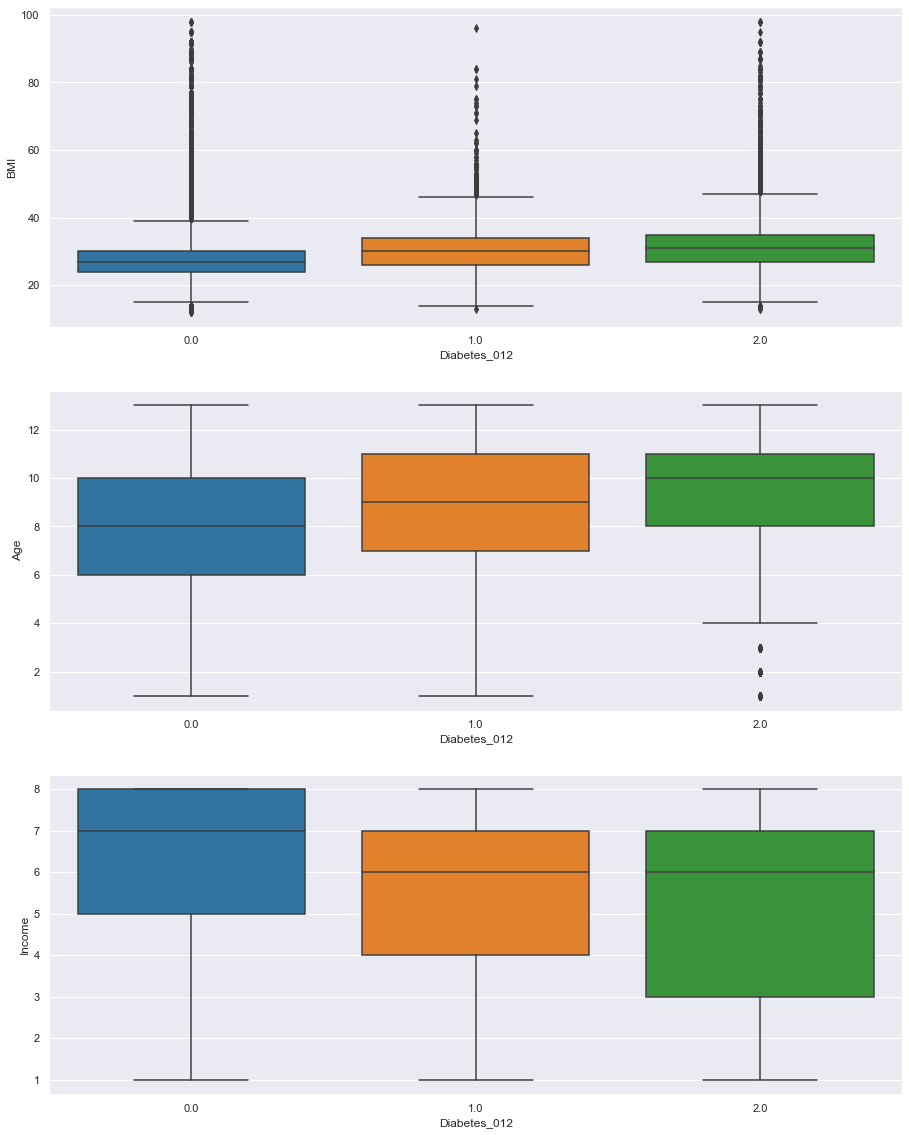

In [11]:
fig, axes = plt.subplots(3, 1)

plt.subplots_adjust(right=2.1, top=3.9)

sns.boxplot(data=df, x="Diabetes_012", y="BMI", ax=axes[0])
sns.boxplot(data=df, x="Diabetes_012", y="Age", ax=axes[1])
sns.boxplot(data=df, x="Diabetes_012", y="Income", ax=axes[2])

По возрасту и доходу выбросов почти нет, либо они незначительны. А вот по индексу массы тела их довольно много

In [12]:
Q1 =  df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)

df_IQR = df[(df["BMI"] > Q1) & (df["BMI"] < Q3)]

In [13]:
print(f"Shape before removing anomalies = {df.shape}")
print(f"Shape after removing anomalies = {df_IQR.shape}")

Shape before removing anomalies = (253680, 22)
Shape after removing anomalies = (108322, 22)


Примерно $42\%$ данных содержит выбросы пл `BMI`. Слишком большой объём, чтобы выбрасывать, так что будем применять нечувствительные к аномалиям алгоритмы и масштабирование.

### Предобработка данных

#### Масштабирование.  
Некоторые переменные (например, BMI и Stroke) заданы в разных единицах измерения и их необходимо нормализовать. Для алгоритмов, основанных на вычислении каких-либо расстояний (например, kNN) данные также необходимо стандартизировать.

In [14]:
from sklearn.preprocessing import StandardScaler, Normalizer

normalized_df = pd.DataFrame(Normalizer().fit_transform(df), columns=df.columns)
standartized_df = pd.DataFrame(StandardScaler().fit_transform(normalized_df), columns=normalized_df.columns)

#### Проверка на мультиколлинеарность

<AxesSubplot:>

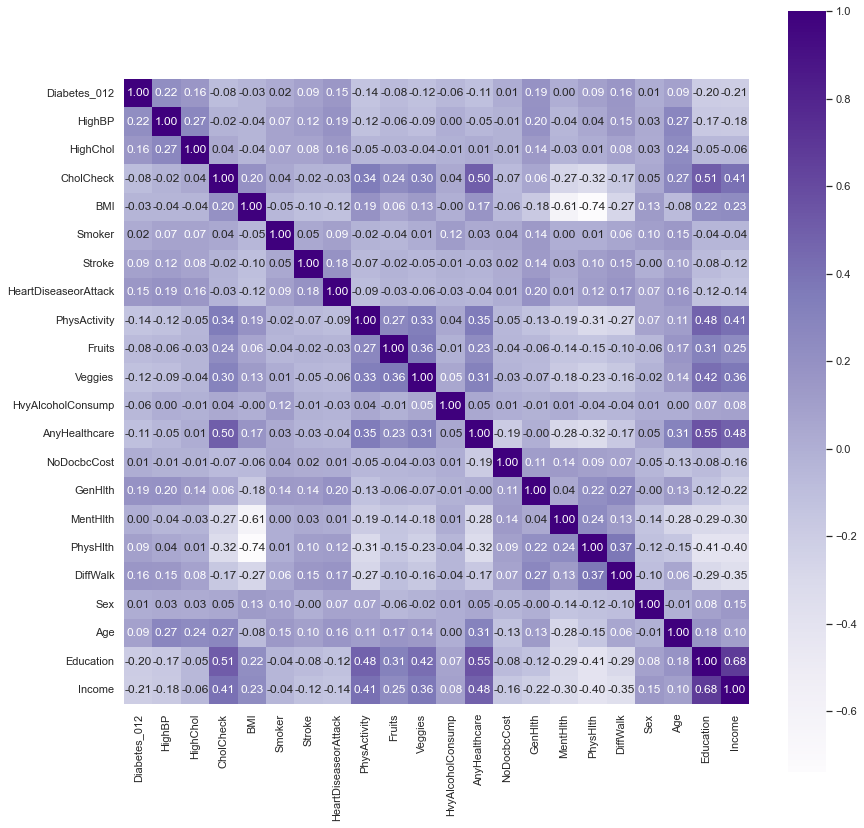

In [15]:
corr = standartized_df.corr()

fig, axes = plt.subplots(figsize=(14, 14))  

sns.heatmap(corr, annot=True, square=True, fmt=".2f", cbar=True, cmap="Purples", ax=axes)

In [16]:
print(corr.where(np.triu(np.abs(corr) > 0.5, k=1)).stack())

CholCheck      Education    0.508495
BMI            MentHlth    -0.608851
               PhysHlth    -0.739230
AnyHealthcare  Education    0.553054
Education      Income       0.675915
dtype: float64


Действительно высоких показателей корреляции (>0.8) не обнаружено, так что выбрасывать переменные не будем

---

### Оверсэмплинг

Так как классы у нас несбалансированы, то воспользуемся оверсэмплингом, а именно методом SMOTE (из библиотеки imbalanced-learn), позволяющим синтезировать элементы в непосредственной близости от уже существующих в меньшем набор.

In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

smote = SMOTE(sampling_strategy="not majority", random_state=SEED)
X_sm, y_sm = smote.fit_resample(X, y)

<AxesSubplot:xlabel='Diabetes_012', ylabel='Count'>

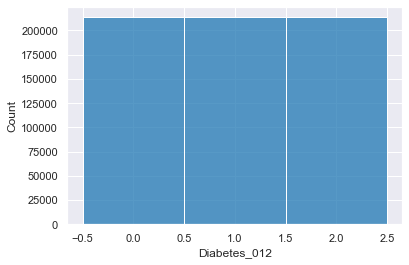

In [18]:
sns.histplot(data=y_sm, discrete=True)

### Разделение выборки на train и test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.32, random_state=SEED, shuffle=True)

### Модель

Попробуем `RandomForest`. Для этого метода у нас подходящая задача (случайный лес хорошо показывает себя в задачах многоклассовой классификации, а еще он тоже устойчив к выбросам).
Также попробуем самые популярные бустинги: `XGBoost`, `CatBoost` и `LightGBM` -- которые в целом обладают теми же преимуществами, но также имеют свои дополнительные фишки и выдают в среднем сильно лучше результат в тех же задачах

Для подбора гиперпараметров разделим тестовую выборку дополнительно на тестовую и валидационную, а также объединим весь препроцессинг и обучение в пайплайн.

In [20]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### Random Forest

In [21]:
%%time

pipeline_rf = Pipeline(steps=[
    ("normalizing", Normalizer()), 
    ("random_forst", RandomForestClassifier())
])

pipeline_rf.fit(X_train, y_train)
print(classification_report(y_test, pipeline_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     68342
         1.0       0.98      0.98      0.98     68295
         2.0       0.91      0.88      0.90     68518

    accuracy                           0.93    205155
   macro avg       0.93      0.93      0.93    205155
weighted avg       0.93      0.93      0.93    205155

CPU times: total: 3min 38s
Wall time: 3min 42s


In [34]:
print(classification_report(y_train, pipeline_rf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    145361
         1.0       1.00      1.00      1.00    145408
         2.0       1.00      1.00      1.00    145185

    accuracy                           1.00    435954
   macro avg       1.00      1.00      1.00    435954
weighted avg       1.00      1.00      1.00    435954



#### CatBoost

In [22]:
%%time

pipeline_cat = Pipeline(steps=[
    ("normalizing", Normalizer()), 
    ("catboost", CatBoostClassifier(learning_rate=0.05, 
                                    early_stopping_rounds=20, 
                                    max_depth=12, 
                                    verbose=10))
])

pipeline_cat.fit(X_train, y_train)
print(classification_report(y_test, pipeline_cat.predict(X_test)))

0:	learn: 1.0739862	total: 3.28s	remaining: 54m 33s
10:	learn: 0.9151826	total: 27.1s	remaining: 40m 35s
20:	learn: 0.8348898	total: 49.9s	remaining: 38m 44s
30:	learn: 0.7827572	total: 1m 11s	remaining: 37m 24s
40:	learn: 0.7478204	total: 1m 33s	remaining: 36m 32s
50:	learn: 0.7218144	total: 1m 55s	remaining: 35m 50s
60:	learn: 0.6995909	total: 2m 17s	remaining: 35m 13s
70:	learn: 0.6819307	total: 2m 41s	remaining: 35m 8s
80:	learn: 0.6667869	total: 3m 2s	remaining: 34m 34s
90:	learn: 0.6537236	total: 3m 24s	remaining: 34m 2s
100:	learn: 0.6419490	total: 3m 47s	remaining: 33m 41s
110:	learn: 0.6321200	total: 4m 8s	remaining: 33m 13s
120:	learn: 0.6217242	total: 4m 30s	remaining: 32m 48s
130:	learn: 0.6109768	total: 4m 53s	remaining: 32m 26s
140:	learn: 0.6026839	total: 5m 16s	remaining: 32m 10s
150:	learn: 0.5943484	total: 5m 39s	remaining: 31m 47s
160:	learn: 0.5859062	total: 6m 1s	remaining: 31m 25s
170:	learn: 0.5788797	total: 6m 25s	remaining: 31m 6s
180:	learn: 0.5715451	total: 6

In [30]:
print(classification_report(y_train, pipeline_cat.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93    145361
         1.0       0.97      0.97      0.97    145408
         2.0       0.95      0.89      0.92    145185

    accuracy                           0.94    435954
   macro avg       0.94      0.94      0.94    435954
weighted avg       0.94      0.94      0.94    435954



#### XGBoost

In [32]:
%%time

pipeline_xgb = Pipeline(steps=[
    ("normalizing", Normalizer()), 
    ("xgboost", XGBClassifier(learning_rate=0.05,  
                              verbosity=1))
])

pipeline_xgb.fit(X_train, y_train)
print(classification_report(y_test, pipeline_xgb.predict(X_test)))

[19:49:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     68342
         1.0       0.68      0.63      0.65     68295
         2.0       0.58      0.57      0.58     68518

    accuracy                           0.68    205155
   macro avg       0.68      0.68      0.68    205155
weighted avg       0.68      0.68      0.68    205155

CPU times: total: 7min 27s
Wall time: 2min 12s


In [33]:
print(classification_report(y_train, pipeline_xgb.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82    145361
         1.0       0.68      0.64      0.66    145408
         2.0       0.59      0.58      0.58    145185

    accuracy                           0.69    435954
   macro avg       0.69      0.69      0.69    435954
weighted avg       0.69      0.69      0.69    435954



#### LightGBM

In [47]:
%%time

pipeline_lgbm = Pipeline(steps=[
    ("normalizing", Normalizer()), 
    ("lightgbm", LGBMClassifier(learning_rate=0.0001, num_leaves=128, min_child_samples=250))
])

pipeline_lgbm.fit(X_train, y_train)
print(classification_report(y_test, pipeline_lgbm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.78     68342
         1.0       0.62      0.66      0.64     68295
         2.0       0.57      0.44      0.49     68518

    accuracy                           0.65    205155
   macro avg       0.64      0.65      0.64    205155
weighted avg       0.64      0.65      0.64    205155

CPU times: total: 48.5 s
Wall time: 13.8 s


In [48]:
print(classification_report(y_train, pipeline_lgbm.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79    145361
         1.0       0.63      0.66      0.64    145408
         2.0       0.57      0.44      0.49    145185

    accuracy                           0.65    435954
   macro avg       0.64      0.65      0.64    435954
weighted avg       0.64      0.65      0.64    435954



Похоже что наилучшего результата (без подбора гиперпараметров) добился случайный лес. Теперь воспользуемся `optuna`, чтобы его улучшить.

### Подбор гиперпараметров

Разделим тестовую выборку на валидационную и тестовую

In [49]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=SEED, shuffle=True)

In [60]:
%%time

from sklearn.metrics import f1_score

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 80, 130)
    max_features = trial.suggest_int("max_features", 2, 21)
    max_depth = trial.suggest_int("max_depth", 1, 15),
    
    pipeline = Pipeline(steps=[
        ("preprocessing", Normalizer()),
        ("random_forest", RandomForestClassifier(
                            n_estimators=n_estimators, 
                            max_features=max_features, 
                            max_depth=max_depth[0])
        )
    ])
    
    model = pipeline.fit(X_train, y_train)
    return f1_score(y_valid, model.predict(X_valid), average="macro")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-01-21 21:12:50,840] A new study created in memory with name: no-name-246bf8a6-18fd-4d1a-ae3b-f5afc10cb065
[I 2023-01-21 21:18:58,965] Trial 0 finished with value: 0.7847410076854696 and parameters: {'n_estimators': 125, 'max_features': 8, 'max_depth': 14}. Best is trial 0 with value: 0.7847410076854696.
[I 2023-01-21 21:21:11,275] Trial 1 finished with value: 0.7047717762280423 and parameters: {'n_estimators': 121, 'max_features': 3, 'max_depth': 11}. Best is trial 0 with value: 0.7847410076854696.
[I 2023-01-21 21:22:23,245] Trial 2 finished with value: 0.5890473854413277 and parameters: {'n_estimators': 82, 'max_features': 5, 'max_depth': 5}. Best is trial 0 with value: 0.7847410076854696.
[I 2023-01-21 21:29:36,742] Trial 3 finished with value: 0.8069065508161991 and parameters: {'n_estimators': 106, 'max_features': 11, 'max_depth': 15}. Best is trial 3 with value: 0.8069065508161991.
[I 2023-01-21 21:42:51,754] Trial 4 finished with value: 0.6782272142925428 and parameters:

CPU times: total: 47min 44s
Wall time: 49min 25s


In [61]:
model = Pipeline(steps=[
    ("preprocessing", Normalizer()),
    ("random_forest", RandomForestClassifier(
                        n_estimators=study.best_trial.params["n_estimators"], 
                        max_features=study.best_trial.params["max_features"], 
                        max_depth=study.best_trial.params["max_depth"]))
])

model.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))

Pipeline(steps=[('preprocessing', Normalizer()),
                ('random_forest',
                 RandomForestClassifier(max_depth=15, max_features=11,
                                        n_estimators=106))])

In [62]:
print("Results on train set")
print(classification_report(pd.concat([y_train, y_valid]), model.predict(pd.concat([X_train, X_valid]))))

Results on train set
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87    179391
         1.0       0.90      0.86      0.88    179529
         2.0       0.78      0.79      0.79    179611

    accuracy                           0.84    538531
   macro avg       0.85      0.84      0.85    538531
weighted avg       0.85      0.84      0.85    538531



In [63]:
print("Results on test set")
print(classification_report(y_test, model.predict(X_test)))

Results on test set
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     34312
         1.0       0.86      0.84      0.85     34174
         2.0       0.75      0.74      0.74     34092

    accuracy                           0.81    102578
   macro avg       0.81      0.81      0.81    102578
weighted avg       0.81      0.81      0.81    102578



## Выводы

В данной работе был проанализирован датасет, основанный на телефонном опросе о медицинских показателях большого количества людей и построены модели, позволяющие определить наличие/отсутствие диабета на основе подобных данных с максимальной точностью `0.93`. Данные предварительно масштабировались и балансировались при помощи оверсэмплинга. Были опробованы алгоритмы `RandomForest`, `CatBoost`, `XGBoost` и `LightGBM`, а также проведен поиск гиперпараметров при помощи `optuna` (увы, не помогло). 